<a href="https://colab.research.google.com/github/mannybernabe/intro_timeseries/blob/master/Intro_time_series_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup & Dependencies

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

#For mounting to drive
from google.colab import drive


#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


In [118]:

#Mount folder to save and retrieve outputs
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/siraj_homework"

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-118-d719a8ea86a4>", line 2, in <module>
    get_ipython().magic('cd "/content/drive/My Drive/siraj_homework"')
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "</usr/local/lib/python3.6/dist-packages/decorator.py:decorator-gen-91>", line 2, in cd
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.g

OSError: ignored

#Import Data and Discovery

In [0]:

df_full = pdr.get_data_yahoo("AAPL", start="2018-01-01").reset_index()

df_full.to_csv('output/AAPL.csv',index=False)


In [0]:
df_full.shape

In [0]:
df_full.head()

In [0]:
df_full.describe()

In [0]:

df_full["Adj Close"].plot()

# Data Preproccessing


In [0]:
df_full.set_index("Date", inplace=True)

In [0]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day


In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [0]:
y_test.shape

#Modeling

In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

## Baseline

In [0]:
y_pred_lag=np.roll(y_test,1)

In [0]:
get_performance(y_pred_lag)

In [0]:
get_plot(y_pred_lag)

## Linear Regression

In [0]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [0]:
get_performance(y_pred_lr)

In [0]:
get_plot(y_pred_lr)

In [119]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.8789
Mean Squared Error: 12.9905
Root Mean Squared Error: 3.6042


## Method #1- Ridge Regression

In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [121]:
get_performance(y_pred_ridge)

Mean Absolute Error: 2.8786
Mean Squared Error: 12.9883
Root Mean Squared Error: 3.6039


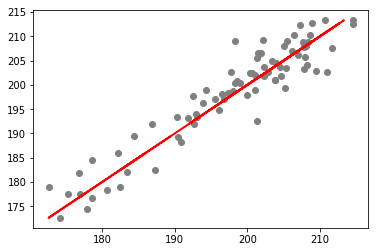

In [122]:
get_plot(y_pred_ridge)

## Gradient Boosting Trees

In [0]:
# Model #2 - Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

In [124]:
get_performance(y_pred_gb)

Mean Absolute Error: 3.1889
Mean Squared Error: 15.3025
Root Mean Squared Error: 3.9118


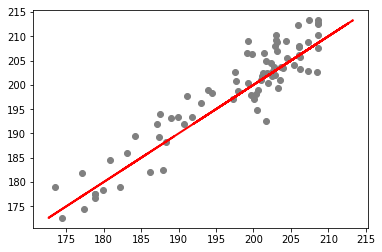

In [125]:
get_plot(y_pred_gb)

# Comparison

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb)})

(9, 20)

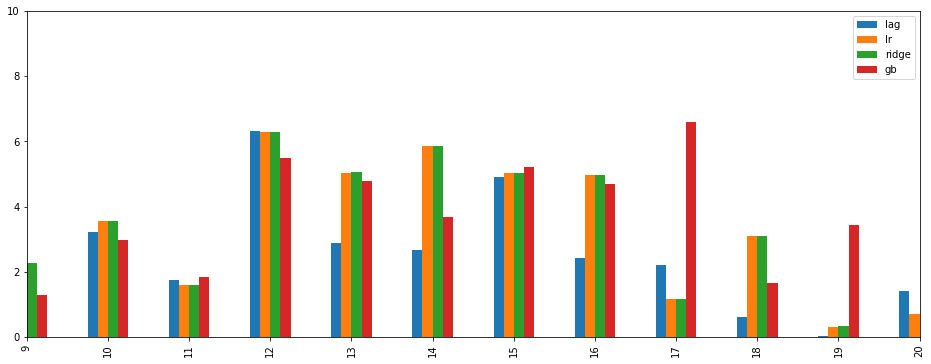

In [127]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)

# Conclusion and Next Steps

We cycled through 4 different algorithms, ranging from simple to complex:

*   lag (previous day's price)
*   linear regression
*   ridge regresssion
*   gradient boosting trees

We concluded that linear regression give us the best performance with the least complexity.

Next steps might include adding additional features such as trend and recent volatility.



# Resources



*   [An Introduction to Statistical Learning](https://www.amazon.com/Introduction-Statistical-Learning-Applications-Statistics/dp/1461471370)
*   [Colab: Agent Trading](https://colab.research.google.com/drive/1FzLCI0AO3c7A4bp9Fi01UwXeoc7BN8sW#scrollTo=Lo2Pg-dcY5_U)
*   [In 12 minutes: Stocks Analysis with Pandas and Scikit-Learn](https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7)
*   [A beginner’s guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)






